## Adquisición y preprocesamiento de la información

<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




### Práctica 3 -Solución



El siguiente fichero del Instituto Nacional de Estadística contiene el número de matrimonios por comunidad autónoma en el año 2021 y según la edad del contrayente

In [59]:
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/matrimonios.csv"

**Ejercicio 1** Leer el fichero desde Pandas


In [61]:
import pandas as pd

# solución
df = pd.read_csv(url,sep=";",encoding="latin1")


In [62]:
# para probar; no tocar esta línea
df

Total Nacional     Sexo           Edad  Periodo  Total     Comunidad
0     Total Nacional  Hombres        18 años     2021      4  01 Andalucía
1     Total Nacional  Hombres        19 años     2021     16  01 Andalucía
2     Total Nacional  Hombres        20 años     2021     19  01 Andalucía
3     Total Nacional  Hombres        21 años     2021     30  01 Andalucía
4     Total Nacional  Hombres        22 años     2021     48  01 Andalucía
...              ...      ...            ...      ...    ...           ...
1601  Total Nacional  Mujeres        49 años     2021      2    19 Melilla
1602  Total Nacional  Mujeres        50 años     2021      1    19 Melilla
1603  Total Nacional  Mujeres        54 años     2021      2    19 Melilla
1604  Total Nacional  Mujeres  60 y más años     2021      1    19 Melilla
1605           =====    =====          =====        0      0         =====

[1606 rows x 6 columns]

**Ejercicio 2** Vemos que la última fila no contiene información relevante. Escribir código para eliminar la última fila y que el resultado sea quede en una nueva variable `df2`


In [30]:
df2 = df.copy()
# solución
df2 = df.iloc[:-1]

# no tocar, es para ver el resultado
df2

Total Nacional     Sexo           Edad  Periodo  Total     Comunidad
0     Total Nacional  Hombres        18 años     2021      4  01 Andalucía
1     Total Nacional  Hombres        19 años     2021     16  01 Andalucía
2     Total Nacional  Hombres        20 años     2021     19  01 Andalucía
3     Total Nacional  Hombres        21 años     2021     30  01 Andalucía
4     Total Nacional  Hombres        22 años     2021     48  01 Andalucía
...              ...      ...            ...      ...    ...           ...
1600  Total Nacional  Mujeres        46 años     2021      1    19 Melilla
1601  Total Nacional  Mujeres        49 años     2021      2    19 Melilla
1602  Total Nacional  Mujeres        50 años     2021      1    19 Melilla
1603  Total Nacional  Mujeres        54 años     2021      2    19 Melilla
1604  Total Nacional  Mujeres  60 y más años     2021      1    19 Melilla

[1605 rows x 6 columns]

**Ejercicio 3**
Las columnas que solo toman un valor no aportan información. Para ver el número de valores y qué valores podemos utilizar `unique()`, que devuelve un array de numpy y `value_counts()`, que devuelve una serie con los valores distintos como índice

In [31]:
df2.Sexo.unique()

array(['Hombres', 'Mujeres'], dtype=object)

In [32]:
df2.Sexo.value_counts()

Mujeres    814
Hombres    791
Name: Sexo, dtype: int64

Escribir un código que muestre el número de valores distintos de cada columna en `df2` 


Pistas: 

       - utilizar un bucle `for` para iterar sobre las columnas 
       - contar el número de valores devueltos por `unique` para cada columna para mostrar la información
       - df2.columns es la lista de todas las columnas de df2

La salida será de la forma

        ...
        Sexo 2
        Edad 45
        ...

In [33]:
# solución
for c in df2.columns:
    print(c,len(df2[c].unique()))

Total Nacional 1
Sexo 2
Edad 45
Periodo 1
Total 396
Comunidad 19


**Ejercicio 4**
A la vista del resultado anterior, escribir código para borrar de df2 las columnas que solo tomen un valor; dejar el resultado en un dataframe `df3`

In [63]:
df3 = df2.copy()
# solución
df3 = df2.drop(columns=[c for c in df2.columns if len(df2[c].unique())==1])

# para ver el resultado
df3

Sexo           Edad  Total     Comunidad
0     Hombres        18 años      4  01 Andalucía
1     Hombres        19 años     16  01 Andalucía
2     Hombres        20 años     19  01 Andalucía
3     Hombres        21 años     30  01 Andalucía
4     Hombres        22 años     48  01 Andalucía
...       ...            ...    ...           ...
1600  Mujeres        46 años      1    19 Melilla
1601  Mujeres        49 años      2    19 Melilla
1602  Mujeres        50 años      1    19 Melilla
1603  Mujeres        54 años      2    19 Melilla
1604  Mujeres  60 y más años      1    19 Melilla

[1605 rows x 4 columns]

**Ejercicio 5** El campo `Edad` es un string, pero nos gustaría que fuera un entero. Esto lo podemos conseguir mediante la siguiente instrucción

In [35]:
df4 = df3.copy()
df4["Edad"] = df3["Edad"].str[0:2].astype("int")
df4

Sexo  Edad  Total     Comunidad
0     Hombres    18      4  01 Andalucía
1     Hombres    19     16  01 Andalucía
2     Hombres    20     19  01 Andalucía
3     Hombres    21     30  01 Andalucía
4     Hombres    22     48  01 Andalucía
...       ...   ...    ...           ...
1600  Mujeres    46      1    19 Melilla
1601  Mujeres    49      2    19 Melilla
1602  Mujeres    50      1    19 Melilla
1603  Mujeres    54      2    19 Melilla
1604  Mujeres    60      1    19 Melilla

[1605 rows x 4 columns]

Escribir código para eliminar el prefijo con 2 números y un espacio de 'Comunidad' (en este caso no hace falta cambiar el tipo, que seguirá siendo string). La salida esperada será de la forma:

    array(['Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes',
           'Canarias', 'Cantabria', 'Castilla y León', 'Castilla - La Mancha',
           'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia',
           'Madrid, Comunidad de', 'Murcia, Región de',
           'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La', 'Ceuta',
           'Melilla'], dtype=object)

In [37]:
df5 = df4.copy()
# solución
df5["Comunidad"] = df5["Comunidad"].str[3:]

# para verlo 
df5["Comunidad"].unique()

array(['Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes',
       'Canarias', 'Cantabria', 'Castilla y León', 'Castilla - La Mancha',
       'Cataluña', 'Comunitat Valenciana', 'Extremadura', 'Galicia',
       'Madrid, Comunidad de', 'Murcia, Región de',
       'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La', 'Ceuta',
       'Melilla'], dtype=object)

In [38]:
df5

Sexo  Edad  Total  Comunidad
0     Hombres    18      4  Andalucía
1     Hombres    19     16  Andalucía
2     Hombres    20     19  Andalucía
3     Hombres    21     30  Andalucía
4     Hombres    22     48  Andalucía
...       ...   ...    ...        ...
1600  Mujeres    46      1    Melilla
1601  Mujeres    49      2    Melilla
1602  Mujeres    50      1    Melilla
1603  Mujeres    54      2    Melilla
1604  Mujeres    60      1    Melilla

[1605 rows x 4 columns]

**Ejercicio 6** A partir de `df5` mostrar el total de matrimonios de 'Mujeres' en 'Andalucía' (será un entero)

In [44]:
# solución
filtroMujeres= (df5.Sexo=="Mujeres") & (df5.Comunidad=="Andalucía")

df5[filtroMujeres]['Total'].sum()

9290

**Ejercicio 7** A partir de df5 mostrar la edad media a la que se han casado mujeres y hombres, con 2 decimales. La salida esperada es de la forma (el orden no importa y los números pueden variar):

    Hombres 39.12
    Mujeres 38.41


In [66]:

# solución
for s in df5.Sexo.unique():
    filtro = df5.Sexo == s
    df_sexo = df5[filtro] # solo hombre, solo mujeres, etc
    total_personas_sexo = df_sexo.Total.sum()
    media = (df_sexo.Edad * df_sexo.Total).sum()/total_personas_sexo
    print(s,round(media,2))

Hombres 37.86
Mujeres 36.08


**Ejercicio 8** (3 puntos) El siguiente código devuelve la lista de identificadores de pinturas relacionadas con Van Gogh en el Metropolitan Museum of Art (MET) de NY. 

In [54]:
import requests
import json
url = "https://collectionapi.metmuseum.org/public/collection/v1/search?departmentId=11&hasImages=true&dateBegin=1888&dateEnd=1890&q=Gogh"
r = requests.get(url)
if r.status_code==200:
    objetos = json.loads(r.text)    
else:
    print("Error!")
objetos  

{'total': 17,
 'objectIDs': [436533,
  436535,
  437984,
  436528,
  436529,
  436536,
  436527,
  436526,
  436530,
  437980,
  436534,
  436525,
  436170,
  436923,
  437671,
  435876,
  437343]}

Lo que deseamos es hacer un bucle que, para cada identificador de objeto, haga un `requests.get` similar al de más arriba, pero a la dirección asociada al objeto concreto, que sera de la forma https://collectionapi.metmuseum.org/public/collection/v1/objects/Id con Id el identificador del objeto, por ejemplo https://collectionapi.metmuseum.org/public/collection/v1/objects/436533 para el primer id (436533), y lo mismo para los siguientes Ids, todo mediante un bucle. 

En cada caso, los datos del objeto devueltos será de la forma (los datos concretos  y el orden variarán, importan las claves):

    {'GalleryNumber': '619',
     ...
     'artistDisplayName': ...,
     'isHighlight': False,
     'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DT11822.jpg',
     'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DT11822.jpg',
     ...
     'title': 'Ignacio Garcini y Queralt (1752–1825), Brigadier of Engineers'}

Se pide, para cada objeto con 'isHighlight' a True, mostrar los campos 'title', "artistDisplayName" así como la imagen que está contenida en 'primaryImageSmall'.

Para mostrar la imagen, asumiendo que extraido del diccionario anterior a través de la clave 'primaryImageSmall' su URL y está en una variable `laImagen`, escribiremos
   

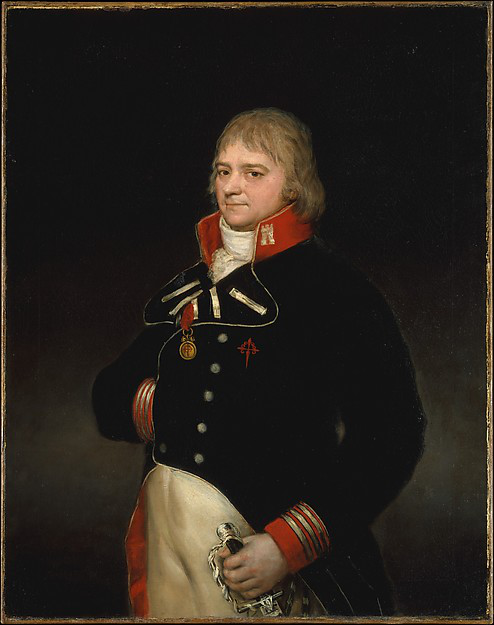

In [56]:

from PIL import Image 
import IPython.display as display

import requests

# esto variará en nuestro caso, ser la primaryImageSmall de cada objeto
laImagen = 'https://images.metmuseum.org/CRDImages/ep/web-large/DT11822.jpg' 

# este código abre el fichero y lo muestra 
with requests.get(laImagen, stream=True).raw as cuadro:
    im = Image.open(cuadro)
    display.display(im)


El resultado serán 2 imágenes de cuadros de Van Gogh y uno de Cézanne. Escribir aquí la solución

Wheat Field with Cypresses Vincent van Gogh


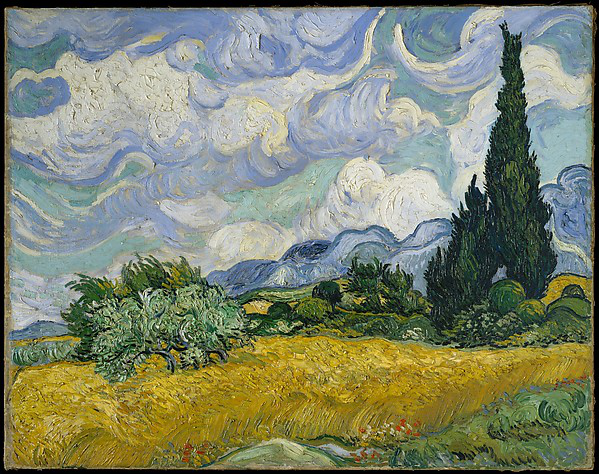

Irises Vincent van Gogh


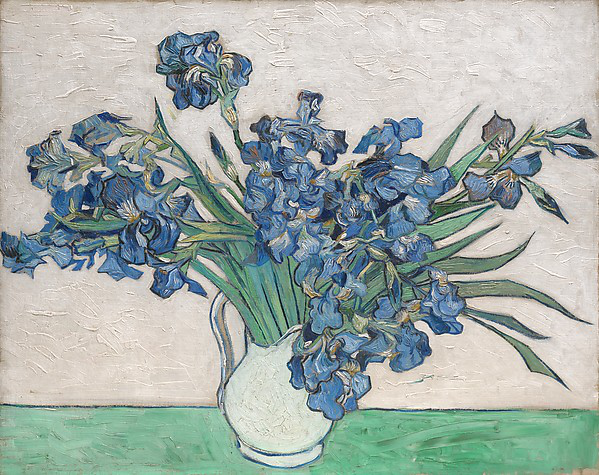

Madame Cézanne (Hortense Fiquet, 1850–1922) in a Red Dress Paul Cézanne


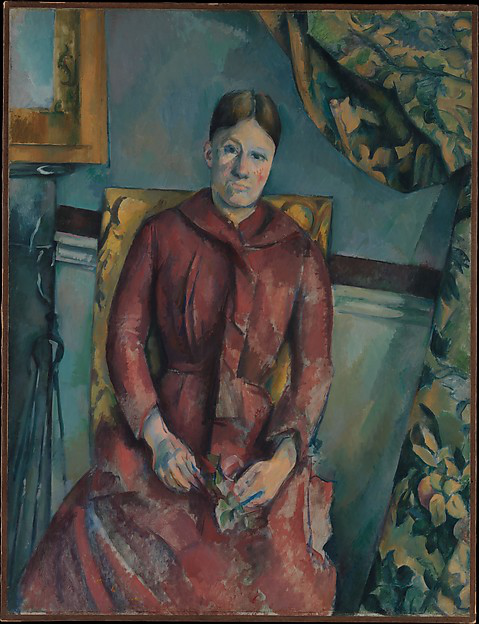

In [58]:
#### solución
from PIL import Image 
import IPython.display as display

import requests

for obj in objetos['objectIDs']:
    url = "https://collectionapi.metmuseum.org/public/collection/v1/objects/"+str(obj)
    r = requests.get(url)
    if r.status_code==200:
        objeto = json.loads(r.text)    
        if objeto['isHighlight']:
            print(objeto["title"],objeto["artistDisplayName"])
            laImagen= objeto["primaryImageSmall"]          
            with requests.get(laImagen, stream=True).raw as cuadro:
                im = Image.open(cuadro)
                display.display(im)
    else:
        print("Error!")